In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\BankCustomerChurnPrediction.csv")
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.shape

(10000, 12)

In [4]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [7]:
data.churn.value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

# D-type conversion

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
data.country.value_counts()
data.country=le.fit_transform(data.country)

In [10]:
data.gender.value_counts()
data.gender=le.fit_transform(data.gender)

In [11]:
data.dtypes

customer_id           int64
credit_score          int64
country               int32
gender                int32
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [12]:
data=data.drop(["customer_id"],axis=1)

In [13]:
data.shape

(10000, 11)

In [14]:
data.head(5)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Model Building

In [15]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [16]:
x.head(1)
#y.head(1)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.0,1,1,1,101348.88


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=100)

In [19]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((8000, 10), (2000, 10), (8000,), (2000,))

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [21]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [22]:
lg_p=lg.predict(x_te)
lg_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
pred_prob=lg.predict_proba(x_te)
pred_prob

array([[0.86038824, 0.13961176],
       [0.79449748, 0.20550252],
       [0.88459489, 0.11540511],
       ...,
       [0.86866772, 0.13133228],
       [0.86135663, 0.13864337],
       [0.93746571, 0.06253429]])

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
lg_m=confusion_matrix(lg_p,y_te)
lg_m

array([[1556,  388],
       [  32,   24]], dtype=int64)

In [26]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

79.0

In [27]:
#tpr=tp/(tp+fn)
tpr_1=1556/(1556+32)
tpr_1

0.9798488664987406

In [28]:
#fpr=fp/(fp+tn)
fpr_1=388/(388+24)
fpr_1

0.941747572815534

In [29]:
#precision=tp/(tp+fp)
precision1=1556/(1556+388)
precision1

0.8004115226337448

In [30]:
#f1score=2(precesion*recall)/(precision+recall)
f1_score1=(2*(precision1*tpr_1))/(precision1+tpr_1)
f1_score1

0.8810872027180068

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(lg_p,y_te))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1944
           1       0.06      0.43      0.10        56

    accuracy                           0.79      2000
   macro avg       0.52      0.61      0.49      2000
weighted avg       0.95      0.79      0.86      2000



In [33]:
#AUC_ROC curve

In [34]:
from sklearn.metrics import roc_auc_score

In [35]:
from sklearn.metrics import roc_curve

In [36]:
roc=roc_auc_score(lg_p,y_te)
roc

0.6144914756025867

In [37]:
df=pd.DataFrame(pred_prob)
df

,0,1
0,0.860388,0.139612
1,0.794497,0.205503
2,0.884595,0.115405
3,0.704705,0.295295
4,0.848901,0.151099
...,...,...
1995,0.906098,0.093902
1996,0.904133,0.095867
1997,0.868668,0.131332
1998,0.861357,0.138643


In [38]:
fpr,tpr,thrshold=roc_curve(y_te,df.iloc[:,1])

In [39]:
fpr

array([0.00000000e+00, 6.29722922e-04, 1.88916877e-03, 1.88916877e-03,
       3.77833753e-03, 3.77833753e-03, 4.40806045e-03, 4.40806045e-03,
       5.66750630e-03, 5.66750630e-03, 6.29722922e-03, 6.29722922e-03,
       6.92695214e-03, 6.92695214e-03, 8.18639798e-03, 8.18639798e-03,
       9.44584383e-03, 9.44584383e-03, 1.07052897e-02, 1.07052897e-02,
       1.44836272e-02, 1.44836272e-02, 1.51133501e-02, 1.51133501e-02,
       1.63727960e-02, 1.63727960e-02, 1.76322418e-02, 1.76322418e-02,
       1.82619647e-02, 1.82619647e-02, 1.95214106e-02, 1.95214106e-02,
       2.01511335e-02, 2.01511335e-02, 2.07808564e-02, 2.07808564e-02,
       2.14105793e-02, 2.14105793e-02, 2.20403023e-02, 2.20403023e-02,
       2.39294710e-02, 2.39294710e-02, 2.51889169e-02, 2.51889169e-02,
       2.64483627e-02, 2.64483627e-02, 2.70780856e-02, 2.70780856e-02,
       3.08564232e-02, 3.08564232e-02, 3.14861461e-02, 3.14861461e-02,
       3.33753149e-02, 3.33753149e-02, 3.52644836e-02, 3.52644836e-02,
      

In [40]:
tpr

array([0.        , 0.        , 0.        , 0.00242718, 0.00242718,
       0.00728155, 0.00728155, 0.00970874, 0.00970874, 0.01456311,
       0.01456311, 0.01699029, 0.01699029, 0.02184466, 0.02184466,
       0.02427184, 0.02427184, 0.02669903, 0.02669903, 0.02912621,
       0.02912621, 0.04126214, 0.04126214, 0.04368932, 0.04368932,
       0.0461165 , 0.0461165 , 0.05097087, 0.05097087, 0.05339806,
       0.05339806, 0.05582524, 0.05582524, 0.06067961, 0.06067961,
       0.06553398, 0.06553398, 0.06796117, 0.06796117, 0.07038835,
       0.07038835, 0.07281553, 0.07281553, 0.07524272, 0.07524272,
       0.0776699 , 0.0776699 , 0.08252427, 0.08252427, 0.08737864,
       0.08737864, 0.08980583, 0.08980583, 0.09466019, 0.09466019,
       0.09951456, 0.09951456, 0.10194175, 0.10194175, 0.10679612,
       0.10679612, 0.11650485, 0.11650485, 0.11893204, 0.11893204,
       0.13106796, 0.13106796, 0.13349515, 0.13349515, 0.13834951,
       0.13834951, 0.1407767 , 0.1407767 , 0.14320388, 0.14320

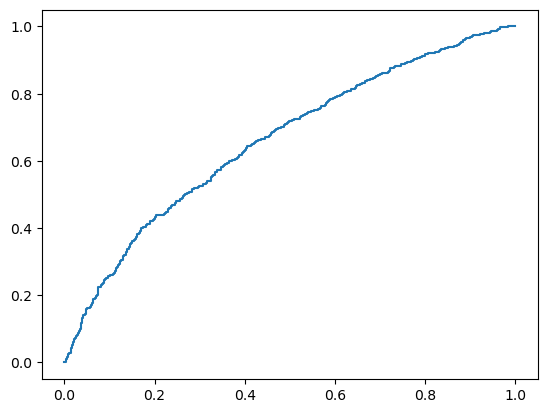

In [41]:
plt.plot(fpr,tpr)

In [42]:
#PRC -  Precision-Recall Curve

In [43]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [44]:
precision,recall,threshold=precision_recall_curve(y_te,df.iloc[:,1])

In [45]:
precision

array([0.206     , 0.20610305, 0.20620621, ..., 0.        , 0.        ,
       1.        ])

In [46]:
recall

array([1., 1., 1., ..., 0., 0., 0.])

Text(0.5, 1.0, 'Precision-Recall')

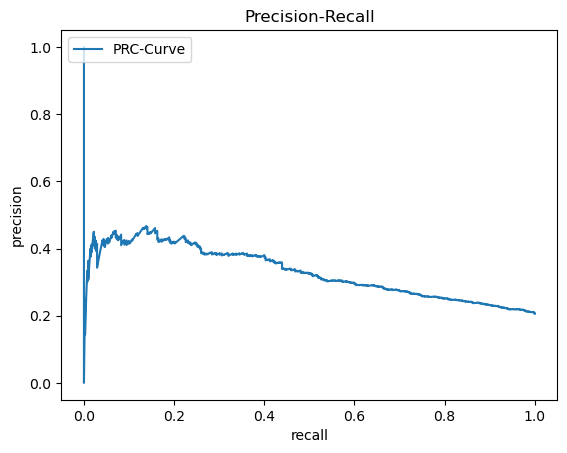

In [47]:
plt.plot(recall,precision,label="PRC-Curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="upper left")
plt.title("Precision-Recall")

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [49]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [50]:
dt_p=dt.predict(x_te)
dt_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
dt_m=confusion_matrix(dt_p,y_te)
dt_m

array([[1366,  228],
       [ 222,  184]], dtype=int64)

In [52]:
dt_acc=dt_m.diagonal().sum()/dt_m.sum()*100
dt_acc

77.5

In [53]:
tpr2=1365/(368+223)
tpr2

2.3096446700507616

In [54]:
fpr2=223/(223+189)
fpr2

0.5412621359223301

In [55]:
precision2=1365/(1365+223)
precision2

0.8595717884130982

In [56]:
f1_score2=(2*(precision2*tpr2))/(precision2+tpr2)
f1_score2

1.2528682882055988

In [57]:
dt.feature_importances_

array([0.144691  , 0.03146825, 0.01876226, 0.22514369, 0.06867592,
       0.14789092, 0.11865371, 0.01906799, 0.0551009 , 0.17054537])

In [58]:
dt_df=pd.DataFrame({"Importances":list(dt.feature_importances_),"columns":list(x)})
dt_df

,Importances,columns
0,0.144691,credit_score
1,0.031468,country
2,0.018762,gender
3,0.225144,age
4,0.068676,tenure
5,0.147891,balance
6,0.118654,products_number
7,0.019068,credit_card
8,0.055101,active_member
9,0.170545,estimated_salary


In [59]:
print(classification_report(dt_p,y_te))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1594
           1       0.45      0.45      0.45       406

    accuracy                           0.78      2000
   macro avg       0.65      0.66      0.65      2000
weighted avg       0.78      0.78      0.78      2000



# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [61]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [62]:
rf_p=rf.predict(x_te)
rf_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
rf_m=confusion_matrix(rf_p,y_te)
rf_m

array([[1535,  234],
       [  53,  178]], dtype=int64)

In [64]:
rf_acc=rf_m.diagonal().sum()/rf_m.sum()*100
rf_acc

85.65

In [65]:
tpr3=1536/(1536+52)
tpr3

0.9672544080604534

In [66]:
fpr3=242/(242+170)
fpr3

0.587378640776699

In [67]:
precision3=1536/(1536+242)
precision3

0.8638920134983127

In [68]:
f1_score3=(2*(precision3*tpr3))/(precision3+tpr3)
f1_score3

0.9126559714795008

In [69]:
print(classification_report(rf_p,y_te))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      1769
           1       0.43      0.77      0.55       231

    accuracy                           0.86      2000
   macro avg       0.70      0.82      0.73      2000
weighted avg       0.90      0.86      0.87      2000



In [70]:
fpr1,tpr1,threshold1=roc_curve(y_te,rf_p)

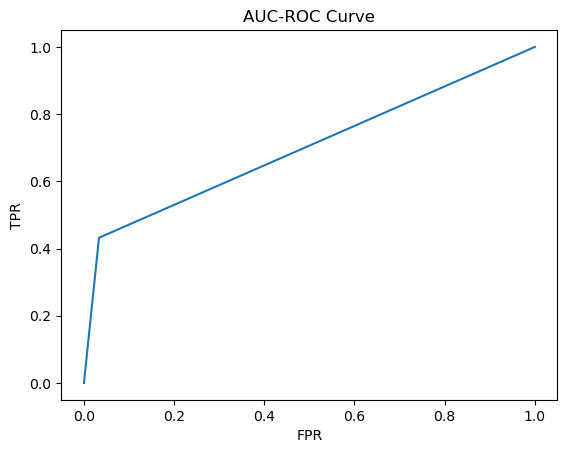

In [71]:
plt.title("AUC-ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr1,tpr1)

In [72]:
precision1,recall1,threshold1=precision_recall_curve(y_te,rf_p)

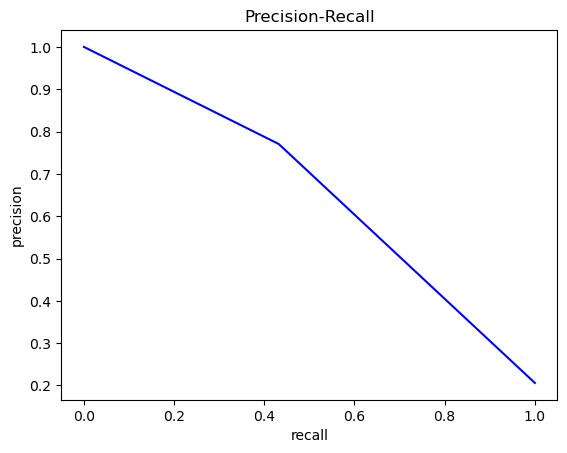

In [73]:
fig,ax=plt.subplots()
ax.plot(recall1,precision1,color="blue")
plt.title("Precision-Recall")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

# KNN-K-nearest Neighbors

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)

In [75]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=25)

In [76]:
knn_p=knn.predict(x_te)

In [77]:
knn_m=confusion_matrix(knn_p,y_te)
knn_m

array([[1587,  412],
       [   1,    0]], dtype=int64)

In [78]:
knn_acc=knn_m.diagonal().sum()/knn_m.sum()*100
knn_acc

79.35

In [79]:
tpr4=1587/(1587+1)
tpr4

0.9993702770780857

In [80]:
fpr4=412/(412+0)
fpr4

1.0

In [81]:
precision4=1587/(1587+412)
precision4

0.7938969484742371

In [82]:
f1_score4=(2*(precision4*tpr4))/(precision4+tpr4)
f1_score4

0.884862001672707

In [83]:
print(classification_report(knn_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      1999
           1       0.00      0.00      0.00         1

    accuracy                           0.79      2000
   macro avg       0.50      0.40      0.44      2000
weighted avg       1.00      0.79      0.88      2000



In [84]:
lst=list()

In [85]:
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr,y_tr)
    knp=knn.predict(x_te)
    c=confusion_matrix(knp,y_te)
    acc=c.diagonal().sum()/c.sum()*100
    lst.append(acc)

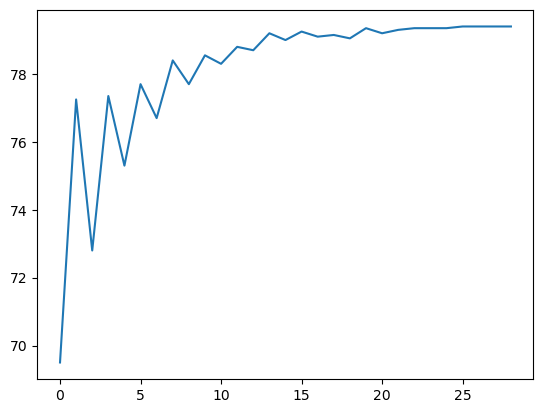

In [86]:
p=plt.plot(lst)

# NB-Naive Bayes

In [87]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [88]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [89]:
nb_p=nb.predict(x_te)

In [90]:
nb_m=confusion_matrix(nb_p,y_te)
nb_m

array([[895, 177],
       [693, 235]], dtype=int64)

In [91]:
nb_acc=nb_m.diagonal().sum()/nb_m.sum()*100
nb_acc

56.49999999999999

In [92]:
tpr5=895/(895+693)
tpr5

0.5636020151133502

In [93]:
fpr5=177/(177+235)
fpr5

0.42961165048543687

In [94]:
precision5=895/(895+177)
precision5

0.8348880597014925

In [95]:
f1_score5=(2*(precision5*tpr5))/(precision5*tpr5)
f1_score5

2.0

In [96]:
print(classification_report(nb_p,y_te))

              precision    recall  f1-score   support

           0       0.56      0.83      0.67      1072
           1       0.57      0.25      0.35       928

    accuracy                           0.56      2000
   macro avg       0.57      0.54      0.51      2000
weighted avg       0.57      0.56      0.52      2000



# SVM-Support Vector Machine

In [97]:
from sklearn.svm import SVC
svc=SVC()

In [98]:
svc.fit(x_tr,y_tr)

SVC()

In [99]:
svc_p=svc.predict(x_te)
svc_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
svc_m=confusion_matrix(svc_p,y_te)
svc_m

array([[1588,  412],
       [   0,    0]], dtype=int64)

In [101]:
svc_acc=svc_m.diagonal().sum()/svc_m.sum()*100
svc_acc

79.4

In [102]:
tpr6=1588/(1588+0)
tpr6

1.0

In [103]:
fpr6=412/(412+0)
fpr6

1.0

In [104]:
precision6=1588/(1588+412)
precision6

0.794

In [105]:
f1_score6=(2*(precision6*tpr6))/(precision6+tpr6)
f1_score6

0.8851727982162765

In [106]:
print(classification_report(svc_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.79      0.89      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.79      2000
   macro avg       0.50      0.40      0.44      2000
weighted avg       1.00      0.79      0.89      2000



# Ada boost

In [107]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [108]:
adbo=AdaBoostClassifier(RandomForestClassifier(),n_estimators=5)

In [109]:
adbo.fit(x_tr,y_tr)

AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=5)

In [110]:
adbo_p=adbo.predict(x_te)

In [111]:
adbo_m=confusion_matrix(adbo_p,y_te)
adbo_m

array([[1539,  235],
       [  49,  177]], dtype=int64)

In [112]:
adbo_acc=adbo_m.diagonal().sum()/adbo_m.sum()*100
adbo_acc

85.8

In [113]:
tpr7=1539/(1539+49)
tpr7

0.9691435768261965

In [114]:
fpr7=238/(238+174)
fpr7

0.5776699029126213

In [115]:
precision7=1539/(1539+238)
precision7

0.8660664040517726

In [116]:
f1_score7=(2*(precision7*tpr7))/(precision7+tpr7)
f1_score7

0.9147102526002971

In [117]:
print(classification_report(adbo_p,y_te))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1774
           1       0.43      0.78      0.55       226

    accuracy                           0.86      2000
   macro avg       0.70      0.83      0.74      2000
weighted avg       0.91      0.86      0.87      2000



# Xg boost

In [118]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [119]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [120]:
xgb_p=xgb.predict(x_te)

In [121]:
xgb_m=confusion_matrix(xgb_p,y_te)
xgb_m

array([[1504,  220],
       [  84,  192]], dtype=int64)

In [122]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

84.8

In [123]:
tpr8=1504/(1504/84)
tpr8

84.0

In [124]:
fpr8=220/(220+192)
fpr8

0.5339805825242718

In [125]:
precision8=1504/(1504+220)
precision8

0.8723897911832946

In [126]:
f1_score8=(2*(precision8*tpr8))/(precision8+tpr8)
f1_score8

1.7268452706396937

In [127]:
print(classification_report(xgb_p,y_te))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1724
           1       0.47      0.70      0.56       276

    accuracy                           0.85      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.88      0.85      0.86      2000



In [128]:
#DF-1
l1=["LG","DT","RF","KNN","NB","SVM","AdaBoost","XgBoost"]
l2=[lg_acc,dt_acc,rf_acc,knn_acc,nb_acc,svc_acc,adbo_acc,xgb_acc]
l3=[tpr_1,tpr2,tpr3,tpr4,tpr5,tpr6,tpr7,tpr8]
l4=[fpr_1,fpr2,fpr3,fpr4,fpr5,fpr6,fpr7,fpr8]
l5=[f1_score1,f1_score2,f1_score3,f1_score4,f1_score5,f1_score6,f1_score7,f1_score8]

In [129]:
d=pd.DataFrame({"Model_Name":l1,"Accuracy":l2,"TPR":l3,"FPR":l4,"F1_score":l5})
d

,Model_Name,Accuracy,TPR,FPR,F1_score
0,LG,79.00,0.979849,0.941748,0.881087
1,DT,77.50,2.309645,0.541262,1.252868
2,RF,85.65,0.967254,0.587379,0.912656
3,KNN,79.35,0.999370,1.000000,0.884862
4,NB,56.50,0.563602,0.429612,2.000000
5,SVM,79.40,1.000000,1.000000,0.885173
6,AdaBoost,85.80,0.969144,0.577670,0.914710
7,XgBoost,84.80,84.000000,0.533981,1.726845


# Random oversampling

In [130]:
c_0,c_1=data["churn"].value_counts()
c_0,c_1

(7963, 2037)

In [131]:
train_0=data[data["churn"]==0]
train_1=data[data["churn"]==1]

In [132]:
train_0.shape,train_1.shape

((7963, 11), (2037, 11))

In [133]:
train_1over=train_1.sample(c_0,replace=True)

In [134]:
train_1over.shape

(7963, 11)

In [135]:
train1_0=pd.concat([train_1over,train_0],axis=0)

In [136]:
train1_0.shape

(15926, 11)

In [137]:
train1_0.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
8671,542,1,0,35,9,127543.11,2,1,0,468.94,1
9527,850,0,0,40,9,99816.46,1,1,1,163989.66,1


In [138]:
train1_0.churn.value_counts()

churn
1    7963
0    7963
Name: count, dtype: int64

# Outlier Treatment

<Axes: >

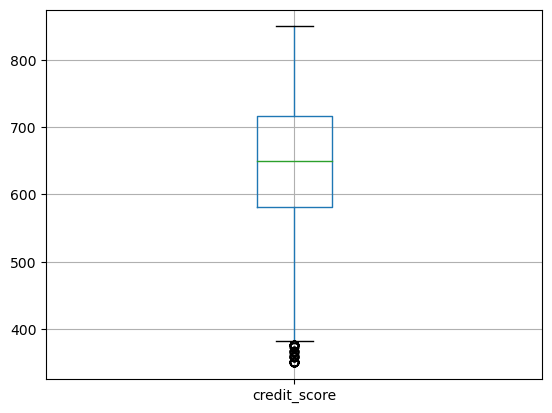

In [139]:
train1_0.boxplot(column="credit_score")

<Axes: xlabel='credit_score', ylabel='Density'>

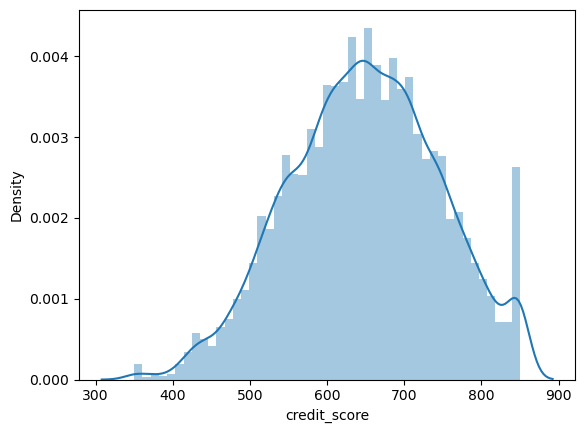

In [140]:
sns.distplot(train1_0["credit_score"])

In [141]:
train1_0.credit_score.skew()

-0.10130426679321505

In [142]:
up=train1_0["credit_score"].mean()+3*train1_0["credit_score"].std()
lb=train1_0["credit_score"].mean()-3*train1_0["credit_score"].std()
print(up,lb)

940.9540420774496 356.221143154247


In [143]:
train1_0.loc[train1_0["credit_score"]<353.4527768742048,"credit_score"]=353.4527768742048

<Axes: >

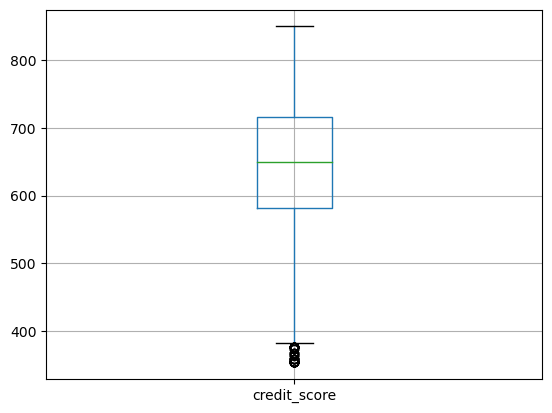

In [144]:
train1_0.boxplot(column="credit_score")

<Axes: xlabel='credit_score', ylabel='Density'>

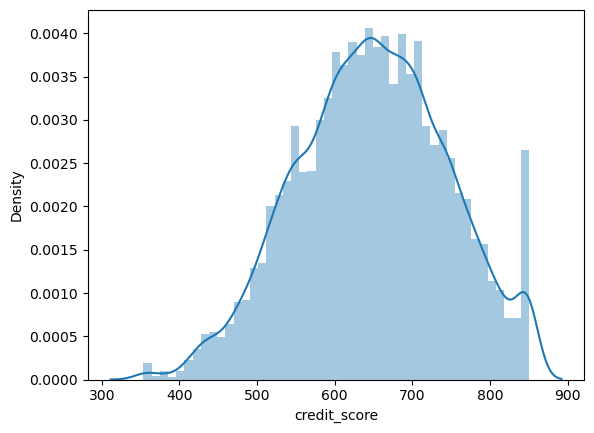

In [145]:
sns.distplot(train1_0["credit_score"])

<Axes: >

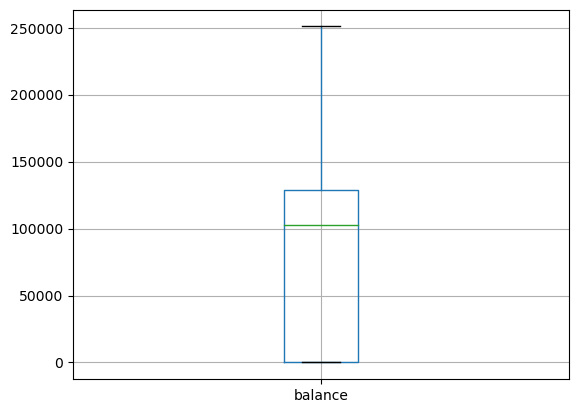

In [146]:
train1_0.boxplot(column="balance")

<Axes: xlabel='balance', ylabel='Density'>

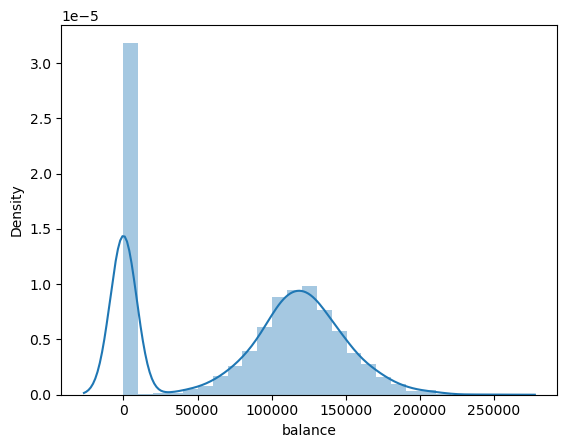

In [147]:
sns.distplot(train1_0["balance"])

<Axes: >

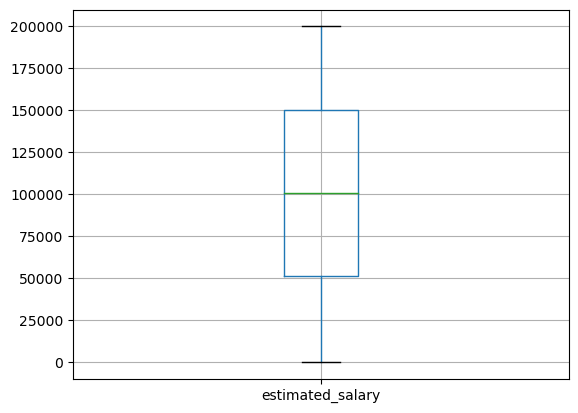

In [148]:
train1_0.boxplot(column="estimated_salary")

<Axes: xlabel='estimated_salary', ylabel='Density'>

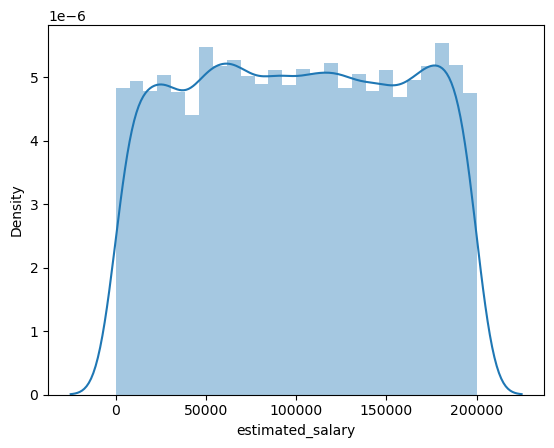

In [149]:
sns.distplot(train1_0["estimated_salary"])

# Skewness Treatment

In [150]:
train1_0.skew()

credit_score       -0.099936
country             0.435441
gender             -0.012811
age                 0.597211
tenure              0.032055
balance            -0.269590
products_number     1.269979
credit_card        -0.872889
active_member       0.178038
estimated_salary   -0.004166
churn               0.000000
dtype: float64

# Visualization

(array([  69.,  313.,  721., 1657., 2260., 3103., 2942., 2405., 1458.,
         998.]),
 array([353.45277687, 403.10749919, 452.7622215 , 502.41694381,
        552.07166612, 601.72638844, 651.38111075, 701.03583306,
        750.69055537, 800.34527769, 850.        ]),
 <BarContainer object of 10 artists>)

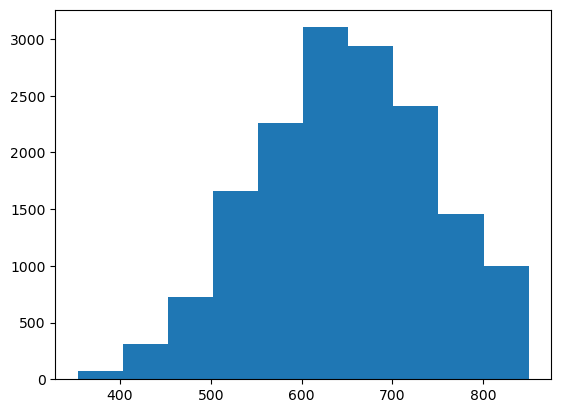

In [151]:
plt.hist(train1_0["credit_score"])

In [152]:
#  The above graph shows symetric data 

<Axes: xlabel='gender', ylabel='credit_card'>

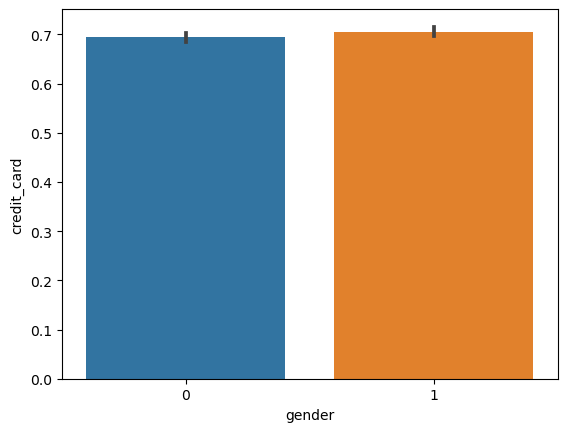

In [153]:
sns.barplot(x="gender",y="credit_card",data=train1_0)

In [154]:
#The above graph shows Male and female having equal credit_card

<Axes: xlabel='balance', ylabel='Density'>

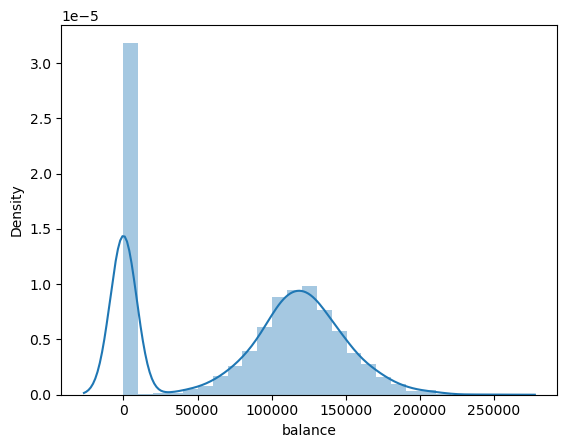

In [155]:
sns.distplot(train1_0["balance"])

In [156]:
# The balance column is not having any skewness

<Axes: xlabel='products_number', ylabel='count'>

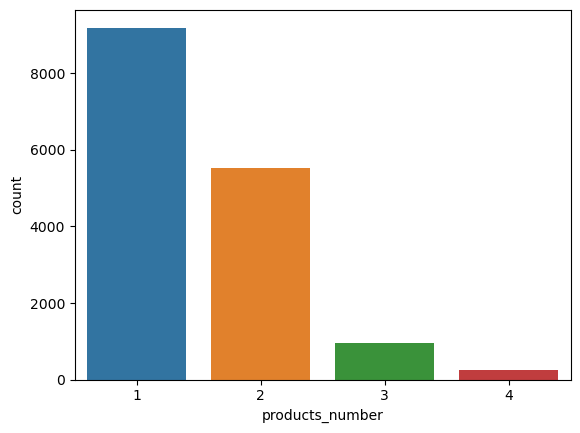

In [157]:
sns.countplot(x="products_number", data=train1_0)

In [158]:
#The above graph shows products_number 1 have highest count

<Axes: xlabel='active_member'>

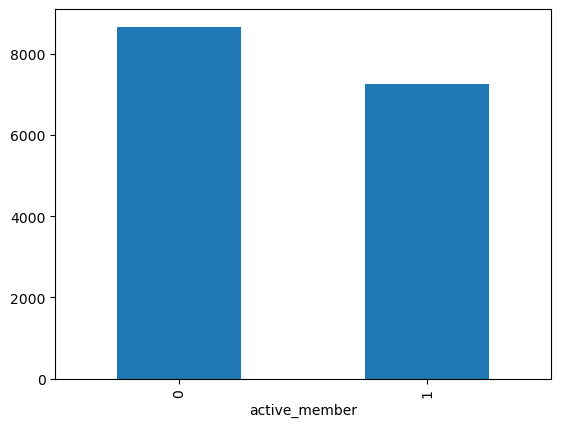

In [159]:
train1_0["active_member"].value_counts().plot.bar()

In [160]:
# In the above graph 1 count have highest than o count

<Axes: xlabel='country', ylabel='count'>

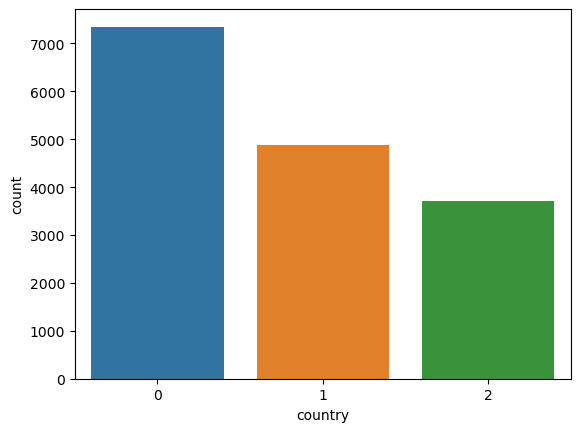

In [161]:
sns.countplot(x="country", data=train1_0)

<Axes: xlabel='churn', ylabel='count'>

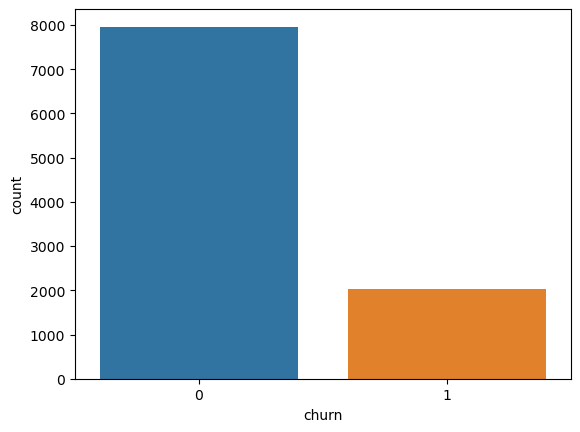

In [162]:
sns.countplot(x="churn", data=data)

<Axes: xlabel='churn', ylabel='count'>

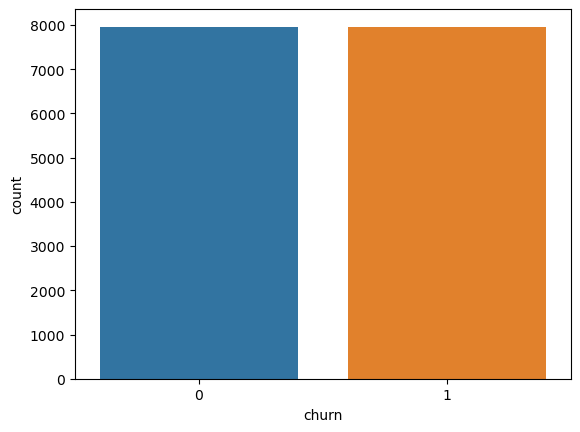

In [163]:
sns.countplot(x="churn", data=train1_0)

In [164]:
cor=train1_0.corr()
cor

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,0.019924,-0.010759,-0.013485,0.012717,0.012744,0.010608,-0.004728,0.020869,-0.021908,-0.033458
country,0.019924,1.000000,-0.002951,0.015916,-0.014022,0.088092,0.005523,-0.014738,0.000917,-0.003830,0.049626
gender,-0.010759,-0.002951,1.000000,-0.048384,0.007920,0.007801,-0.036882,0.012688,0.030829,-0.012697,-0.138644
age,-0.013485,0.015916,-0.048384,1.000000,-0.013937,0.049393,-0.029147,-0.018988,0.015548,-0.005018,0.349071
tenure,0.012717,-0.014022,0.007920,-0.013937,1.000000,0.000157,0.010052,-0.000667,-0.029920,0.019331,-0.020511
balance,0.012744,0.088092,0.007801,0.049393,0.000157,1.000000,-0.185497,-0.010113,-0.027490,-0.000178,0.148199
products_number,0.010608,0.005523,-0.036882,-0.029147,0.010052,-0.185497,1.000000,0.005929,0.034947,0.025350,-0.044208
credit_card,-0.004728,-0.014738,0.012688,-0.018988,-0.000667,-0.010113,0.005929,1.000000,-0.028285,-0.018570,-0.015620
active_member,0.020869,0.000917,0.030829,0.015548,-0.029920,-0.027490,0.034947,-0.028285,1.000000,-0.015788,-0.198572
estimated_salary,-0.021908,-0.003830,-0.012697,-0.005018,0.019331,-0.000178,0.025350,-0.018570,-0.015788,1.000000,0.013811


<Axes: >

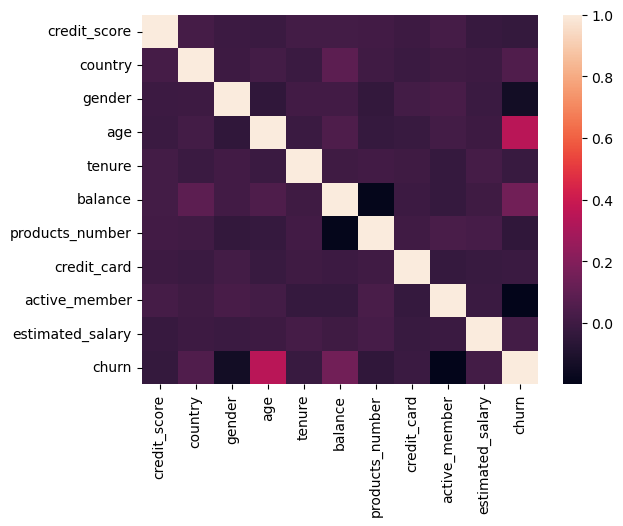

In [165]:
sns.heatmap(cor)

In [166]:
x1=train1_0.iloc[:,:-1]
y1=train1_0.iloc[:,-1]

In [167]:
x1.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
8671,542.0,1,0,35,9,127543.11,2,1,0,468.94
9527,850.0,0,0,40,9,99816.46,1,1,1,163989.66
1570,717.0,2,0,49,1,110864.38,2,1,1,124532.90
4151,627.0,0,1,44,6,153548.12,1,0,0,35300.08
208,643.0,0,1,45,5,0.00,1,1,0,142513.50


In [168]:
y1.shape,x1.shape

((15926,), (15926, 10))

In [169]:
x1_tr,x1_te,y1_tr,y1_te=train_test_split(x1,y1,test_size=0.2,random_state=100)

In [170]:
x1_tr.shape,x1_te.shape,y1_tr.shape,y1_te.shape

((12740, 10), (3186, 10), (12740,), (3186,))

# Logestic Regression

In [171]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [172]:
lg.fit(x1_tr,y1_tr)

LogisticRegression()

In [173]:
lg_p1=lg.predict(x1_te)
lg_p1

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [174]:
lg_m1=confusion_matrix(lg_p1,y1_te)
lg_m1

array([[1065,  519],
       [ 534, 1068]], dtype=int64)

In [175]:
lg_acc1=lg_m1.diagonal().sum()/lg_m1.sum()*100
lg_acc1

66.94915254237289

In [176]:
tpr9=1050/(1050+549)
tpr9

0.6566604127579737

In [177]:
fpr9=480/(480+1107)
fpr9

0.30245746691871456

In [178]:
precision9=1050/(1050+480)
precision9

0.6862745098039216

In [179]:
f1_score9=(2*(precision9*tpr9))/(precision9+tpr9)
f1_score9

0.6711409395973154

In [180]:
print(classification_report(lg_p1,y1_te))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1584
           1       0.67      0.67      0.67      1602

    accuracy                           0.67      3186
   macro avg       0.67      0.67      0.67      3186
weighted avg       0.67      0.67      0.67      3186



# Decision Tree

In [181]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [182]:
dt.fit(x1_tr,y1_tr)

DecisionTreeClassifier()

In [183]:
dt_p1=dt.predict(x1_te)
dt_p1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [184]:
dt_m1=confusion_matrix(dt_p1,y1_te)
dt_m1

array([[1369,   34],
       [ 230, 1553]], dtype=int64)

In [185]:
dt_acc1=dt_m1.diagonal().sum()/dt_m1.sum()*100
dt_acc1

91.71374764595103

In [186]:
tpr10=1372/(1372+227)
tpr10

0.858036272670419

In [187]:
fpr10=33/(33+1554)
fpr10

0.020793950850661626

In [188]:
precision10=1372/(1372+33)
precision10

0.9765124555160143

In [189]:
f1_score10=(2*(precision10*tpr10))/(precision10+tpr10)
f1_score10

0.9134487350199735

In [190]:
print(classification_report(dt_p1,y1_te))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1403
           1       0.98      0.87      0.92      1783

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.92      3186
weighted avg       0.92      0.92      0.92      3186



# Random Forest

In [191]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [192]:
rf.fit(x1_tr,y1_tr)

RandomForestClassifier()

In [193]:
rf_pre1=rf.predict(x1_te)
rf_pre1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [194]:
rf_mat1=confusion_matrix(rf_pre1,y1_te)
rf_mat1

array([[1489,   31],
       [ 110, 1556]], dtype=int64)

In [195]:
rf_acc1=rf_mat1.diagonal().sum()/rf_mat1.sum()*100
rf_acc1

95.5743879472693

In [196]:
tpr11=1479/(1479+120)
tpr11

0.924953095684803

In [197]:
fpr11=27/(27+1560)
fpr11

0.017013232514177693

In [198]:
precision11=1479/(1479+27)
precision11

0.9820717131474104

In [199]:
f1_score11=(2*(precision11*tpr11))/(precision11+tpr11)
f1_score11

0.9526570048309179

In [200]:
print(classification_report (rf_pre1,y1_te))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1520
           1       0.98      0.93      0.96      1666

    accuracy                           0.96      3186
   macro avg       0.96      0.96      0.96      3186
weighted avg       0.96      0.96      0.96      3186



In [201]:
precision2,recall2,threshold2=precision_recall_curve(y1_te,rf_pre1)

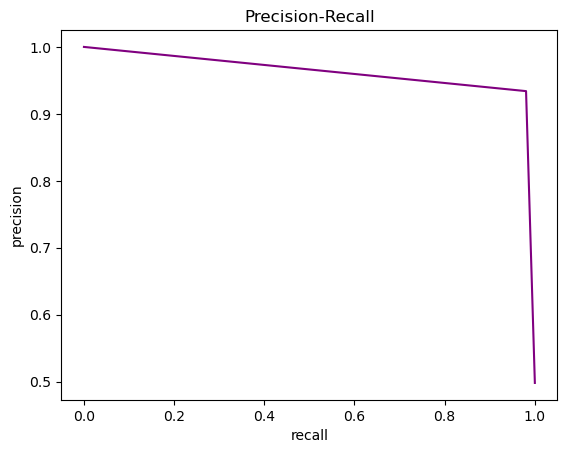

In [202]:
fig,ax1=plt.subplots()
ax1.plot(recall2,precision2,color="purple")
plt.title("Precision-Recall")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

# KNN

In [203]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)

In [204]:
knn.fit(x1_tr,y1_tr)

KNeighborsClassifier(n_neighbors=25)

In [205]:
knn_p1=knn.predict(x1_te)

In [206]:
knn_m1=confusion_matrix(knn_p1,y1_te)
knn_m1

array([[ 884,  573],
       [ 715, 1014]], dtype=int64)

In [207]:
knn_acc1=knn_m1.diagonal().sum()/knn_m1.sum()*100
knn_acc1

59.57313245448839

In [208]:
tpr12=922/(922+677)
tpr12

0.5766103814884302

In [209]:
fpr12=555/(555+1032)
fpr12

0.3497164461247637

In [210]:
precision12=922/(922+555)
precision12

0.6242383209207854

In [211]:
f1_score12=(2*(precision12*tpr12))/(precision12+tpr12)
f1_score12

0.599479843953186

In [212]:
print(classification_report(knn_p1,y1_te))

              precision    recall  f1-score   support

           0       0.55      0.61      0.58      1457
           1       0.64      0.59      0.61      1729

    accuracy                           0.60      3186
   macro avg       0.60      0.60      0.60      3186
weighted avg       0.60      0.60      0.60      3186



# NB-Naive Bayes

In [213]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [214]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [215]:
nb_p1=nb.predict(x1_te)

In [216]:
nb_m1=confusion_matrix(nb_p1,y1_te)
nb_m1

array([[881, 715],
       [718, 872]], dtype=int64)

In [217]:
nb_acc1=nb_m1.diagonal().sum()/nb_m1.sum()*100
nb_acc1

55.021971123666034

In [218]:
tpr13=881/(881+718)
tpr13

0.5509693558474046

In [219]:
fpr13=735/(735+852)
fpr13

0.46313799621928164

In [220]:
precision13=881/(881+735)
precision13

0.5451732673267327

In [221]:
f1_score13=(2*(precision13*tpr13))/(precision13+tpr13)
f1_score13

0.5480559875583204

In [222]:
print(classification_report(nb_p1,y1_te))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1596
           1       0.55      0.55      0.55      1590

    accuracy                           0.55      3186
   macro avg       0.55      0.55      0.55      3186
weighted avg       0.55      0.55      0.55      3186



# SVM

In [223]:
from sklearn.svm import SVC
svc=SVC()

In [224]:
svc.fit(x1_tr,y1_tr)

SVC()

In [225]:
svc_p1=svc.predict(x1_te)
svc_p1

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [226]:
svc_m1=confusion_matrix(svc_p1,y1_te)
svc_m1

array([[ 618,  409],
       [ 981, 1178]], dtype=int64)

In [227]:
svc_acc1=svc_m1.diagonal().sum()/svc_m1.sum()*100
svc_acc1

56.37162586315129

In [228]:
tpr14=617/(617+982)
tpr14

0.38586616635397125

In [229]:
fpr14=370/(370+1217)
fpr14

0.23314429741650913

In [230]:
precision14=617/(617+370)
precision14

0.6251266464032421

In [231]:
f1_score14=(2*(precision14*tpr14))/(precision14+tpr14)
f1_score14

0.47718484145398293

In [232]:
print(classification_report(svc_p1,y1_te))

              precision    recall  f1-score   support

           0       0.39      0.60      0.47      1027
           1       0.74      0.55      0.63      2159

    accuracy                           0.56      3186
   macro avg       0.56      0.57      0.55      3186
weighted avg       0.63      0.56      0.58      3186



# Ada boost

In [233]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [234]:
adbo=AdaBoostClassifier(RandomForestClassifier(),n_estimators=5)

In [235]:
adbo.fit(x1_tr,y1_tr)

AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=5)

In [236]:
adbo_p1=adbo.predict(x1_te)

In [237]:
adbo_m1=confusion_matrix(adbo_p1,y1_te)
adbo_m1

array([[1484,   31],
       [ 115, 1556]], dtype=int64)

In [238]:
adbo_acc1=adbo_m1.diagonal().sum()/adbo_m1.sum()*100
adbo_acc1

95.41745134965474

In [239]:
tpr15=1479/(1479+120)
tpr15

0.924953095684803

In [240]:
fpr15=34/(34+1553)
fpr15

0.02142407057340895

In [241]:
precision15=1479/(1479+34)
precision15

0.9775280898876404

In [242]:
f1_score15=(2*(precision15*tpr15))/(precision15+tpr15)
f1_score15

0.9505141388174806

In [243]:
print(classification_report(adbo_p1,y1_te))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1515
           1       0.98      0.93      0.96      1671

    accuracy                           0.95      3186
   macro avg       0.95      0.96      0.95      3186
weighted avg       0.96      0.95      0.95      3186



# Xg boost

In [244]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [245]:
xgb.fit(x1_tr,y1_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [246]:
xgb_p1=xgb.predict(x1_te)

In [247]:
xgb_m1=confusion_matrix(xgb_p1,y1_te)
xgb_m1

array([[1391,  108],
       [ 208, 1479]], dtype=int64)

In [248]:
xgb_acc1=xgb_m1.diagonal().sum()/xgb_m1.sum()*100
xgb_acc1

90.08160703075957

In [249]:
tpr16=1398/(1398+201)
tpr16

0.874296435272045

In [250]:
fpr16=102/(102+1485)
fpr16

0.06427221172022685

In [251]:
precision16=1398/(1398+102)
precision16

0.932

In [252]:
f1_score16=(2*(precision16*tpr16))/(precision16+tpr16)
f1_score16

0.9022265246853824

In [253]:
print(classification_report(xgb_p1,y1_te))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1499
           1       0.93      0.88      0.90      1687

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



In [254]:
#DF-2
l7=["LG","DT","RF","KNN","NB","SVM","AdaBoost","XgBoost"]
l8=[lg_acc1,dt_acc1,rf_acc1,knn_acc1,nb_acc1,svc_acc1,adbo_acc1,xgb_acc1]
l9=[tpr9,tpr10,tpr11,tpr12,tpr13,tpr14,tpr15,tpr16]
l10=[fpr9,fpr10,fpr11,fpr12,fpr13,fpr14,fpr15,fpr16]
l12=[f1_score9,f1_score10,f1_score11,f1_score12,f1_score13,f1_score14,f1_score15,f1_score16]

In [255]:
d1=pd.DataFrame({"Model_Name":l7,"Accuracy":l8,"TPR":l9,"FPR":l10,"F1_score":l12})
d1

,Model_Name,Accuracy,TPR,FPR,F1_score
0,LG,66.949153,0.656660,0.302457,0.671141
1,DT,91.713748,0.858036,0.020794,0.913449
2,RF,95.574388,0.924953,0.017013,0.952657
3,KNN,59.573132,0.576610,0.349716,0.599480
4,NB,55.021971,0.550969,0.463138,0.548056
5,SVM,56.371626,0.385866,0.233144,0.477185
6,AdaBoost,95.417451,0.924953,0.021424,0.950514
7,XgBoost,90.081607,0.874296,0.064272,0.902227


# Feature Engineering

# RFE

In [256]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree=DecisionTreeClassifier()

In [257]:
rfe=RFE(dTree)

In [258]:
rfe.fit(train1_0.iloc[:,:-1],train1_0.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier())

In [259]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
        True])

In [260]:
rfe_df=pd.DataFrame({"Importances":list(rfe.support_),"Columns":list(train1_0.iloc[:,:-1].columns)})
rfe_df

,Importances,Columns
0,True,credit_score
1,False,country
2,False,gender
3,True,age
4,False,tenure
5,True,balance
6,True,products_number
7,False,credit_card
8,False,active_member
9,True,estimated_salary


In [261]:
sorted_df=rfe_df.sort_values(["Importances"],ascending=False)
sorted_df

,Importances,Columns
0,True,credit_score
3,True,age
5,True,balance
6,True,products_number
9,True,estimated_salary
1,False,country
2,False,gender
4,False,tenure
7,False,credit_card
8,False,active_member


In [262]:
s=train1_0.drop(["country","gender","tenure","credit_card","active_member"],axis=1)

In [263]:
s.head()

,credit_score,age,balance,products_number,estimated_salary,churn
8671,542.0,35,127543.11,2,468.94,1
9527,850.0,40,99816.46,1,163989.66,1
1570,717.0,49,110864.38,2,124532.90,1
4151,627.0,44,153548.12,1,35300.08,1
208,643.0,45,0.00,1,142513.50,1


In [264]:
x3=s.iloc[:,:-1]
y3=s.iloc[:,-1]

In [265]:
x3.head(1)

,credit_score,age,balance,products_number,estimated_salary
8671,542.0,35,127543.11,2,468.94


In [266]:
from sklearn.model_selection import train_test_split

In [267]:
x3_tr,x3_te,y3_tr,y3_te=train_test_split(x3,y3,test_size=0.2,random_state=100)

In [268]:
x3_tr.shape,x3_te.shape,y3_tr.shape,y3_te.shape

((12740, 5), (3186, 5), (12740,), (3186,))

# DT

In [269]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [270]:
dt.fit(x3_tr,y3_tr)

DecisionTreeClassifier()

In [271]:
dt_p2=dt.predict(x3_te)
dt_p2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [272]:
from sklearn.metrics import confusion_matrix

In [273]:
dt_m2=confusion_matrix(dt_p2,y3_te)
dt_m2

array([[1344,   39],
       [ 255, 1548]], dtype=int64)

In [274]:
dt_acc2=dt_m2.diagonal().sum()/dt_m2.sum()*100
dt_acc2

90.77212806026365

In [275]:
tpr17=1373/(1373+226)
tpr17

0.8586616635397123

In [276]:
fpr17=50/(50+1537)
fpr17

0.0315059861373661

In [277]:
precision17=1373/(1373+50)
precision17

0.9648629655657063

In [278]:
f1_score17=(2*(precision17*tpr17))/(precision17+tpr17)
f1_score17

0.9086697551290536

In [279]:
dt.feature_importances_

array([0.19445199, 0.25804123, 0.18041304, 0.14371624, 0.2233775 ])

In [280]:
dt_df1=pd.DataFrame({"Importances":list(dt.feature_importances_),"columns":list(x3)})
dt_df1

,Importances,columns
0,0.194452,credit_score
1,0.258041,age
2,0.180413,balance
3,0.143716,products_number
4,0.223377,estimated_salary


In [281]:
from sklearn.metrics import classification_report

In [282]:
print(classification_report(dt_p2,y3_te))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1383
           1       0.98      0.86      0.91      1803

    accuracy                           0.91      3186
   macro avg       0.91      0.92      0.91      3186
weighted avg       0.92      0.91      0.91      3186



# RF

In [283]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [284]:
rf.fit(x3_tr,y3_tr)

RandomForestClassifier()

In [285]:
rf_p2=rf.predict(x3_te)
rf_p2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [286]:
rf_m2=confusion_matrix(rf_p2,y3_te)
rf_m2

array([[1440,   35],
       [ 159, 1552]], dtype=int64)

In [287]:
rf_acc2=rf_m2.diagonal().sum()/rf_m2.sum()*100
rf_acc2

93.91086001255493

In [288]:
tpr18=1443/(1443+156)
tpr18

0.9024390243902439

In [289]:
fpr18=35/(35+1552)
fpr18

0.02205419029615627

In [290]:
precision18=1443/(1443+35)
precision18

0.976319350473613

In [291]:
f1_score18=(2*(precision18*tpr18))/(precision18+tpr18)
f1_score18

0.9379265518362041

In [292]:
rf.feature_importances_

array([0.19795531, 0.25905826, 0.17949882, 0.15096494, 0.21252267])

In [293]:
rf_df2=pd.DataFrame({"Importances":list(rf.feature_importances_),"columns":list(x3)})
rf_df2

,Importances,columns
0,0.197955,credit_score
1,0.259058,age
2,0.179499,balance
3,0.150965,products_number
4,0.212523,estimated_salary


In [294]:
print(classification_report(rf_p2,y3_te))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1475
           1       0.98      0.91      0.94      1711

    accuracy                           0.94      3186
   macro avg       0.94      0.94      0.94      3186
weighted avg       0.94      0.94      0.94      3186



In [295]:
precision3,recall3,threshold3=precision_recall_curve(y3_te,rf_p2)

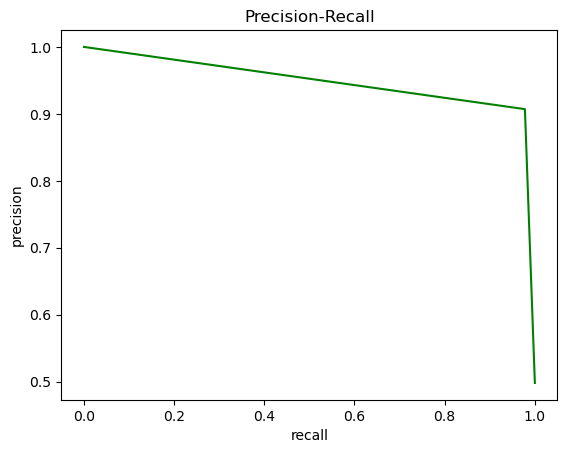

In [296]:
fig,ax2=plt.subplots()
ax2.plot(recall3,precision3,color="green")
plt.title("Precision-Recall")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

# LG

In [297]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [298]:
lg.fit(x3_tr,y3_tr)

LogisticRegression()

In [299]:
lg_p2=lg.predict(x3_te)
lg_p2

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [300]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [301]:
lg_m2=confusion_matrix(lg_p2,y3_te)
lg_m2

array([[1043,  520],
       [ 556, 1067]], dtype=int64)

In [302]:
lg_acc2=lg_m2.diagonal().sum()/lg_m2.sum()*100
lg_acc2

66.2272441933459

In [303]:
tpr19=1029/(1029+570)
tpr19

0.6435272045028143

In [304]:
fpr19=509/(509+1078)
fpr19

0.3207309388783869

In [305]:
precision19=1029/(1029+509)
precision19

0.6690507152145644

In [306]:
f1_score19=(2*(precision19*tpr19))/(precision19+tpr19)
f1_score19

0.6560408033152693

In [307]:
print(classification_report(lg_p2,y3_te))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1563
           1       0.67      0.66      0.66      1623

    accuracy                           0.66      3186
   macro avg       0.66      0.66      0.66      3186
weighted avg       0.66      0.66      0.66      3186



# KNN

In [308]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)

In [309]:
knn.fit(x3_tr,y3_tr)

KNeighborsClassifier(n_neighbors=15)

In [310]:
knn_p2=knn.predict(x3_te)

In [311]:
knn_m2=confusion_matrix(knn_p2,y3_te)
knn_m2

array([[ 914,  533],
       [ 685, 1054]], dtype=int64)

In [312]:
knn_acc2=knn_m2.diagonal().sum()/knn_m2.sum()*100
knn_acc2

61.77024482109228

In [313]:
tpr20=940/(940+659)
tpr20

0.5878674171357098

In [314]:
fpr20=489/(489+1098)
fpr20

0.30812854442344045

In [315]:
precision20=940/(940+489)
precision20

0.6578026592022393

In [316]:
f1_score20=(2*(precision20*tpr20))/(precision20+tpr20)
f1_score20

0.6208718626155878

In [317]:
print(classification_report(knn_p2,y3_te))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60      1447
           1       0.66      0.61      0.63      1739

    accuracy                           0.62      3186
   macro avg       0.62      0.62      0.62      3186
weighted avg       0.62      0.62      0.62      3186



# NB

In [318]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [319]:
nb.fit(x3_tr,y3_tr)

MultinomialNB()

In [320]:
nb_p2=nb.predict(x3_te)

In [321]:
nb_m2=confusion_matrix(nb_p2,y3_te)
nb_m2

array([[881, 715],
       [718, 872]], dtype=int64)

In [322]:
nb_acc2=nb_m2.diagonal().sum()/nb_m2.sum()*100
nb_acc2

55.021971123666034

In [323]:
tpr21=890/(890+709)
tpr21

0.5565978736710444

In [324]:
fpr21=746/(746+841)
fpr21

0.4700693131695022

In [325]:
precision21=890/(890+746)
precision21

0.5440097799511002

In [326]:
f1_score21=(2*(precision21*tpr21))/(precision21+tpr21)
f1_score21

0.5502318392581144

In [327]:
print(classification_report(nb_p2,y3_te))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1596
           1       0.55      0.55      0.55      1590

    accuracy                           0.55      3186
   macro avg       0.55      0.55      0.55      3186
weighted avg       0.55      0.55      0.55      3186



# SVM

In [328]:
from sklearn.svm import SVC
svc=SVC()

In [329]:
svc.fit(x3_tr,y3_tr)

SVC()

In [330]:
svc_p2=svc.predict(x3_te)

In [331]:
svc_m2=confusion_matrix(svc_p2,y3_te)
svc_m2

array([[ 618,  409],
       [ 981, 1178]], dtype=int64)

In [332]:
svc_acc2=svc_m2.diagonal().sum()/svc_m2.sum()*100
svc_acc2

56.37162586315129

In [333]:
tpr22=616/(616+983)
tpr22

0.38524077548467794

In [334]:
fpr22=369/(369+1218)
fpr22

0.23251417769376181

In [335]:
precision22=616/(616+369)
precision22

0.6253807106598985

In [336]:
f1_score22=(2*(precision22*tpr22))/(precision22+tpr22)
f1_score22

0.4767801857585139

In [337]:
print(classification_report(svc_p2,y3_te))

              precision    recall  f1-score   support

           0       0.39      0.60      0.47      1027
           1       0.74      0.55      0.63      2159

    accuracy                           0.56      3186
   macro avg       0.56      0.57      0.55      3186
weighted avg       0.63      0.56      0.58      3186



# Adaboost

In [338]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [339]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [340]:
adbo.fit(x3_tr,y3_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [341]:
adbo_p2=adbo.predict(x3_te)

In [342]:
adboo_m2=confusion_matrix(adbo_p2,y3_te)
adboo_m2

array([[1333,   37],
       [ 266, 1550]], dtype=int64)

In [343]:
adbo_acc2=adboo_m2.diagonal().sum()/adboo_m2.sum()*100
adbo_acc2

90.48964218455744

In [344]:
tpr23=1382/(1382+217)
tpr23

0.8642901813633521

In [345]:
fpr23=48/(48+1539)
fpr23

0.030245746691871456

In [346]:
precision23=1382/(1382+48)
precision23

0.9664335664335665

In [347]:
f1_score23=(2*(precision23*tpr23))/(precision23+tpr23)
f1_score23

0.9125123803235392

In [348]:
print(classification_report(adbo_p2,y3_te))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1370
           1       0.98      0.85      0.91      1816

    accuracy                           0.90      3186
   macro avg       0.91      0.91      0.90      3186
weighted avg       0.92      0.90      0.91      3186



# XgBoost

In [349]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [350]:
xgb.fit(x3_tr,y3_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [351]:
xgb_p2=xgb.predict(x3_te)

In [352]:
xgb_m2=confusion_matrix(xgb_p2,y3_te)
xgb_m2

array([[1329,  145],
       [ 270, 1442]], dtype=int64)

In [353]:
xgb_acc2=xgb_m2.diagonal().sum()/xgb_m2.sum()*100
xgb_acc2

86.97426239799121

In [354]:
tpr24=1316/(1316+283)
tpr24

0.8230143839899937

In [355]:
fpr24=172/(172+1415)
fpr24

0.10838059231253938

In [356]:
precision24=1316/(1316+172)
precision24

0.8844086021505376

In [357]:
f1_score24=(2*(precision24*tpr24))/(precision24+tpr24)
f1_score24

0.8526077097505669

In [358]:
print(classification_report(xgb_p2,y3_te))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1474
           1       0.91      0.84      0.87      1712

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



In [359]:
#DF-3
l13=["LG","DT","RF","KNN","NB","SVM","AdaBoost","XgBoost"]
l14=[lg_acc2,dt_acc2,rf_acc2,knn_acc2,nb_acc2,svc_acc2,adbo_acc2,xgb_acc2]
l15=[tpr19,tpr17,tpr18,tpr19,tpr20,tpr21,tpr22,tpr23]
l16=[fpr19,fpr17,fpr18,fpr19,fpr20,fpr21,fpr22,fpr23]
l18=[f1_score19,f1_score17,f1_score18,f1_score19,f1_score20,f1_score21,f1_score22,f1_score23]

In [360]:
d2=pd.DataFrame({"Model_Name":l13,"Accuracy":l14,"TPR":l15,"FPR":l16,"F1_score":l18})
d2

,Model_Name,Accuracy,TPR,FPR,F1_score
0,LG,66.227244,0.643527,0.320731,0.656041
1,DT,90.772128,0.858662,0.031506,0.908670
2,RF,93.910860,0.902439,0.022054,0.937927
3,KNN,61.770245,0.643527,0.320731,0.656041
4,NB,55.021971,0.587867,0.308129,0.620872
5,SVM,56.371626,0.556598,0.470069,0.550232
6,AdaBoost,90.489642,0.385241,0.232514,0.476780
7,XgBoost,86.974262,0.864290,0.030246,0.912512
